In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv(r"C:\Users\asus\Documents\ML Lab\Dataset\advertising.csv")
dataset

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   Ad_Topic_Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [5]:
dataset.drop(['Ad_Topic_Line', 'City', 'Country'], axis=1, inplace=True)
dataset

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [6]:
dataset[pd.isnull(dataset).any(axis=1)]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad


In [7]:
y = dataset.Clicked_on_Ad.copy()
x = dataset.drop(['Clicked_on_Ad'], axis=1)

In [8]:
x

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


# Corelation

In [17]:
def pearson(x,y):
    correlation_matrix = np.corrcoef(x,y)
    return correlation_matrix

In [21]:
CoRelation = pearson(x.Daily_Time_Spent_on_Site, y)
print(CoRelation[0,1])

-0.7481165641196349


In [23]:
CoRelation = pearson(x.Age, y)
print(CoRelation[0,1])

0.4925312655560376


In [25]:
CoRelation = pearson(x.Area_Income, y)
print(CoRelation[0,1])

-0.4762546275321447


In [27]:
CoRelation = pearson(x.Male, y)
print(CoRelation[0,1])

-0.03802746574898808


# Covariance

In [28]:
covariance = np.cov(x.Daily_Time_Spent_on_Site, y)
print(covariance[0,1])

-5.933143143143142


In [29]:
covariance = np.cov(x.Age, y)
print(covariance[0,1])

2.164664664664665


In [30]:
covariance = np.cov(x.Area_Income, y)
print(covariance[0,1])

-3195.989159159159


In [31]:
covariance = np.cov(x.Male, y)
print(covariance[0,1])

-0.00950950950950951


# Train and Test

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((750, 5), (250, 5), (750,), (250,))

# Logistic Regression Model

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = pd.Series(model.predict(x_test))

In [13]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis = 1)
z.columns = ['True', 'Prediction']
acc_log = metrics.accuracy_score(y_test, y_pred)

In [14]:
z

,True,Prediction
0,1,1
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
245,0,1
246,0,0
247,0,0
248,1,0


In [15]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.888
Precision: 0.9279279279279279
Recall: 0.8373983739837398


Text(0.5, 15.0, 'Predicted')

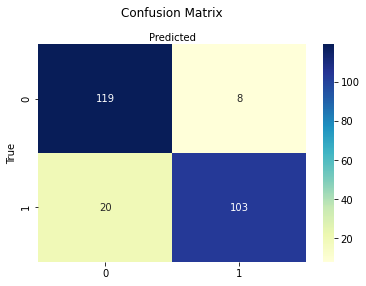

In [126]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y =1.1)
plt.ylabel("True")
plt.xlabel("Predicted")

# Classification KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)

In [129]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.684
Precision: 0.7037037037037037
Recall: 0.6178861788617886


# Classification SVM

In [130]:
from sklearn.svm import SVC, LinearSVC

In [131]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = metrics.accuracy_score(y_test, y_pred)

In [132]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.508
Precision: 0.0
Recall: 0.0


# Classification Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB

In [134]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)

acc_gaussian = metrics.accuracy_score(y_test, y_pred)

In [135]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.98
Precision: 0.9758064516129032
Recall: 0.983739837398374


# Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_pred = decision_tree.predict(x_test)

acc_decision = metrics.accuracy_score(y_test, y_pred)

In [149]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.956
Precision: 0.9444444444444444
Recall: 0.967479674796748


# Perceptron

In [136]:
from sklearn.linear_model import Perceptron

In [137]:
percptn =Perceptron()
percptn.fit(x_train,y_train)
y_pred=percptn.predict(x_test)

acc_perceptn=metrics.accuracy_score(y_test,y_pred)

In [138]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.508
Precision: 0.0
Recall: 0.0


# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
randomForest = RandomForestClassifier()
randomForest.fit(x_train,y_train)
y_pred = randomForest.predict(x_test)

acc_randomForest = metrics.accuracy_score(y_test, y_pred)

In [141]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.98
Precision: 0.9836065573770492
Recall: 0.975609756097561


# Stochastic Gradient Descent

In [142]:
from sklearn.linear_model import SGDClassifier

In [153]:
SGD = SGDClassifier()
SGD.fit(x_train, y_train)
y_pred = SDG.predict(x_test)

acc_SGD = metrics.accuracy_score(y_test, y_pred)

In [154]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.508
Precision: 0.0
Recall: 0.0


In [145]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       127
           1       0.00      0.00      0.00       123

    accuracy                           0.51       250
   macro avg       0.25      0.50      0.34       250
weighted avg       0.26      0.51      0.34       250



In [155]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes', 
              'Decision Tree', 'Perceptron', 'Random Forest', 'Stochastic Gradient Descent'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision, acc_perceptn, acc_randomForest, acc_SGD]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.980,Naive Bayes
0.980,Random Forest
0.956,Decision Tree
0.888,Logistic Regression
0.684,KNN
0.508,Support Vector Machines
0.508,Perceptron
0.508,Stochastic Gradient Descent


# Bar Chart

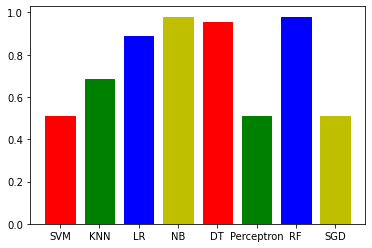

In [223]:
barlist=plt.bar( 
    ["SVM", "KNN", "LR","NB", "DT", 'Perceptron', "RF", "SGD"],
    [acc_linear_svc, acc_knn, acc_log, acc_gaussian, acc_decision, acc_perceptn, acc_randomForest, acc_SGD],
    width = .75
)

barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('y')
barlist[4].set_color('r')
barlist[5].set_color('g')
barlist[6].set_color('b')
barlist[7].set_color('y')

plt.show()